### 캐글즐기기 파트4 * Bayesian Statistics: Techniques and Models

### link : http://r4ds.had.co.nz/factors.html
### R for Data Science (15/16 Factors/Dates and times)


### 15 Factors
#### 15.1 Introduction

- R에서 요소는 범주 형 변수, 고정 된 알려진 값 집합을 가진 변수로 작업하는 데 사용됩니다. 
- 알파벳 순서가 아닌 순서로 문자 벡터를 표시하려는 경우에도 유용합니다.

- 역사적으로 요인은 문자보다 작업하기가 훨씬 쉬웠습니다. 
- 결과적으로 기본 R에있는 많은 함수는 자동으로 문자를 인수로 변환합니다. 
- 즉, 요인이 실제로 도움이되지 않는 곳에서 종종 자랍니다. 다행스럽게도, 당신은 깔끔한 방향으로 그것에 대해 걱정할 필요가 없으며, 요인들이 진정으로 유용한 상황에 집중할 수 있습니다.


#### 15.1.1 Prerequisites

- 요인을 다루기 위해 forcats 패키지를 사용합니다. forcats 패키지는 범주 형 변수를 다루는 도구를 제공합니다 (또한 요소의 분석기입니다).
- 요소 작업을 위한 다양한 헬퍼를 제공합니다. forcats는 핵심 tidyverse의 일부가 아니므로 명시적으로 로드해야합니다.

In [1]:
library(tidyverse)
library(forcats)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


### 15.2 Creating factors
- Imagine that you have a variable that records month:

- 문자열을 사용하여이 변수를 기록하는 데는 두 가지 문제점이 있습니다.

1) 가능한 한 12 개월 밖에 없으며 오타가 생기는 것을 막을 수있는 방법은 없습니다.

2) 그것은 유용한 방식으로 정렬하지 않습니다.


In [2]:
x1 <- c("Dec", "Apr", "Jan", "Mar")

In [3]:
x2 <- c("Dec", "Apr", "Jam", "Mar")

In [4]:
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"

In [13]:
month_levels <- c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

In [14]:
y1 <- factor(x1, levels = month_levels)
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [15]:
sort(y1)

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [17]:
y2 <- parse_factor(x2, levels = month_levels)
x2
y2

Warning message:
“1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
”

[1] "Dec" "Apr" "Jam" "Mar"

[1] Dec  Apr  <NA> Mar 
attr(,"problems")
# A tibble: 1 × 4
    row   col           expected actual
  <int> <int>              <chr>  <chr>
1     3    NA value in level set    Jam
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [18]:
# 레벨을 생략하면 알파벳 순서로 데이터에서 가져옵니다
factor(x1)

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar

In [12]:
f1 <- factor(x1, levels = unique(x1))
f1

#때로는 레벨의 순서가 데이터에서 처음 나타나는 순서와 일치하는 것을 선호합니다. 
#레벨을 unique(x)로 설정하여 요인을 만들 때 또는 사실 이후에 할 수 있습니다.

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

In [20]:
x1
f2 <- x1 %>% factor() %>% fct_inorder()
f2

[1] "Dec" "Apr" "Jan" "Mar"

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

In [19]:
levels(f2)

[1] "Dec" "Apr" "Jan" "Mar"

### 15.3 General Social Survey
- 이 장의 나머지 부분에서는 forcats :: gss_cat에 초점을 맞출 것입니다. 
- 시카고 대학 (University of Chicago)의 독립적 조사 기관인 NORC가 실시한 미국의 장기 설문 조사 인 '일반 사회 조사 (General Social Survey)'의 데이터 샘플입니다. 
- 설문 조사에는 수천 개의 질문이 있으므로 gss_cat에서 요인을 사용하여 작업 할 때 직면하게 될 몇 가지 공통적 인 문제를 설명하는 소수를 선택했습니다.

In [21]:
gss_cat

year,marital,age,race,rincome,partyid,relig,denom,tvhours
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA
2000,Never married,36,White,$25000 or more,Not str republican,Christian,Not applicable,3
2000,Divorced,44,White,$7000 to 7999,"Ind,near dem",Protestant,Lutheran-mo synod,NA
2000,Married,44,White,$25000 or more,Not str democrat,Protestant,Other,0
2000,Married,47,White,$25000 or more,Strong republican,Protestant,Southern baptist,3


In [22]:
gss_cat %>%
  count(race)

race,n
Other,1959
Black,3129
White,16395


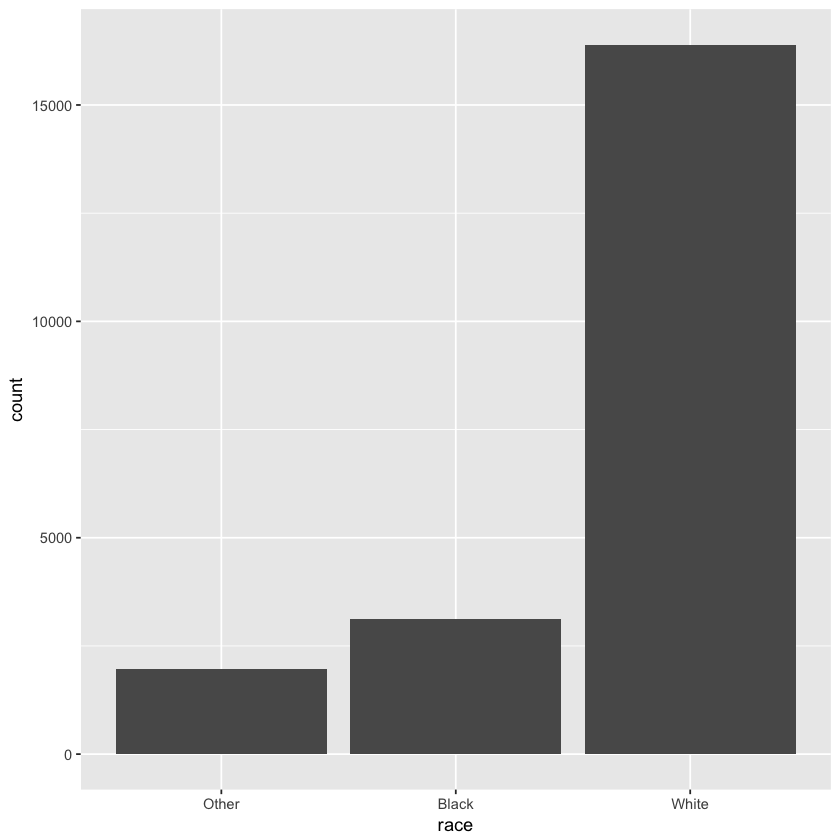

In [23]:
ggplot(gss_cat, aes(race)) +
  geom_bar()

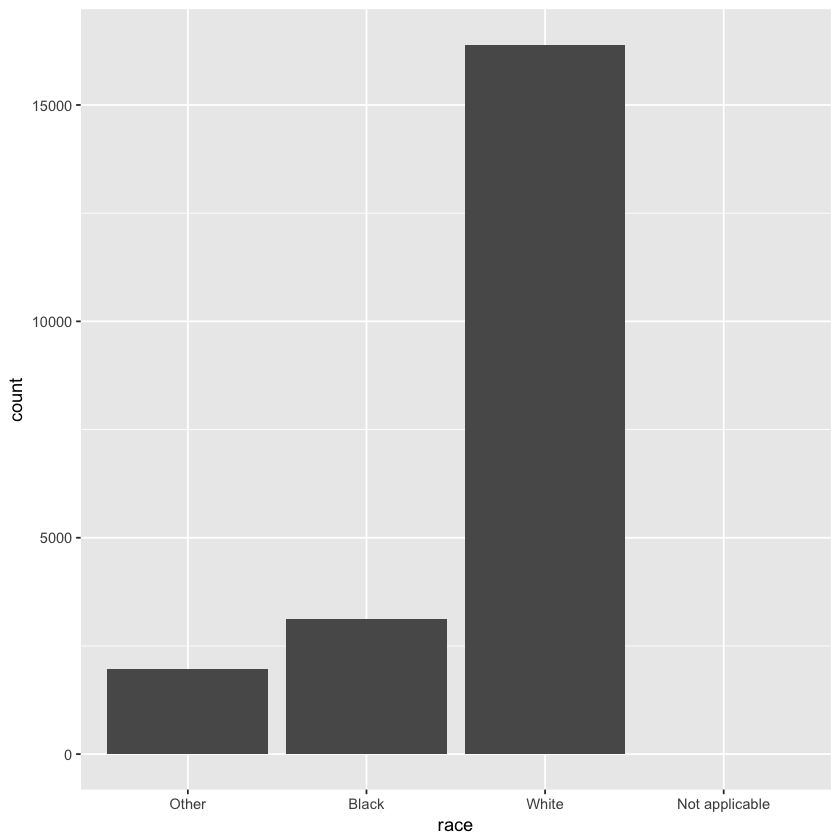

In [24]:
ggplot(gss_cat, aes(race)) +
  geom_bar() +
  scale_x_discrete(drop = FALSE)

- 이 수준은 이 데이터 집합에서 단순히 발생하지 않은 유효한 값을 나타냅니다.
- 불행히도, dplyr은 아직 드롭 옵션을 가지고 있지는 않지만 미래에는 그렇게 될 것입니다.
- 요인으로 작업 할 때 가장 일반적인 두 가지 작업은 수준의 순서를 변경하고 수준의 값을 변경하는 것입니다. 이러한 작업은 아래 섹션에서 설명합니다.

### 15.4 Modifying factor order

- 시각화에서 요인 수준의 순서를 변경하는 것이 종종 유용합니다. 예를 들어 종교 간 TV 시청 평균 시간을 알아 보려한다고 가정 해 보겠습니다.

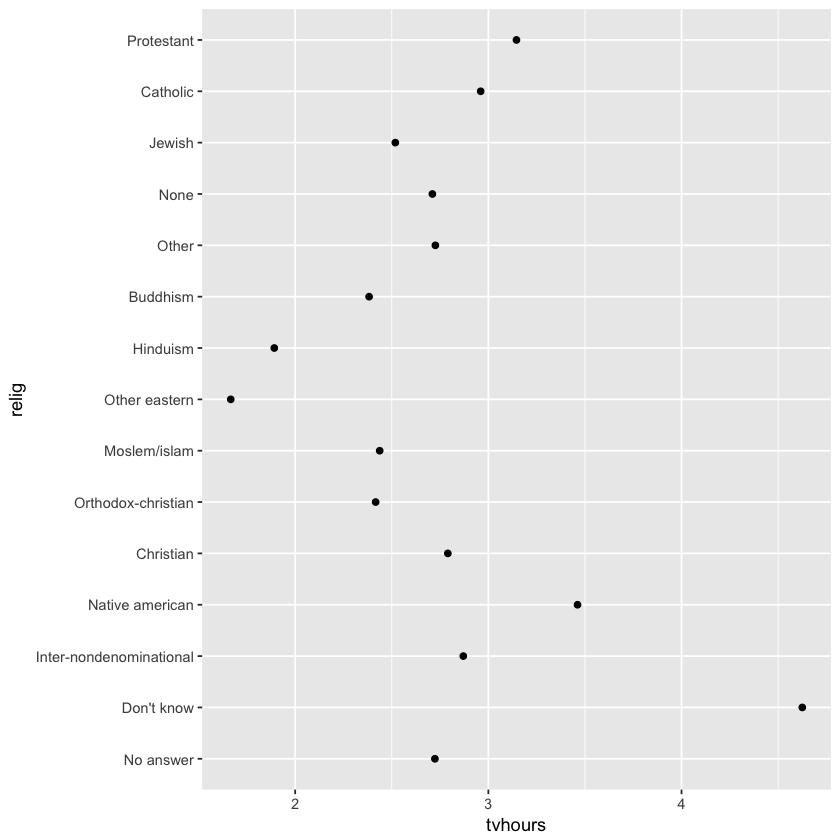

In [26]:
relig_summary <- gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(relig_summary, aes(tvhours, relig)) + geom_point()

- 전체 패턴이 없으므로이 플롯을 해석하기가 어렵습니다.
- 우리는 fct_reorder ()를 사용하여 종교 수준을 재정렬함으로써 그것을 향상시킬 수 있습니다. fct_reorder ()는 세 개의 인수를 취합니다.
    - f, 레벨을 수정하려는 요소.
    - x는 레벨을 재정렬하는 데 사용할 숫자 벡터입니다.
    - 선택적으로 fun, f의 각 값에 대해 x 값이 여러 개인 경우 사용되는 함수입니다. 기본값은 중앙값입니다.

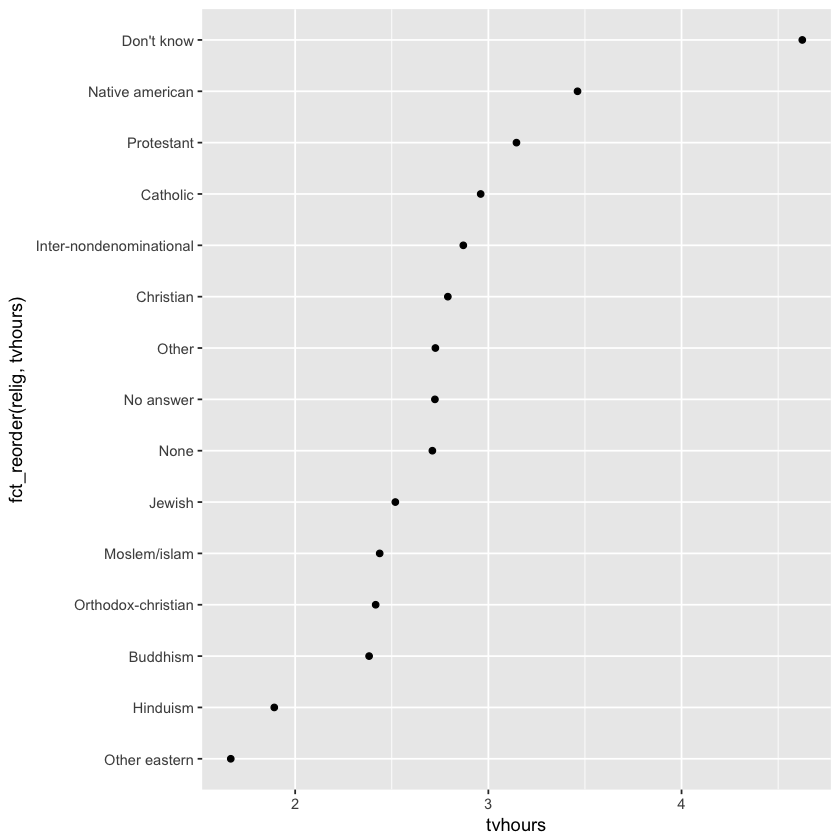

In [27]:
ggplot(relig_summary, aes(tvhours, fct_reorder(relig, tvhours))) +
  geom_point()

- 종교를 재정렬하면 "알지 못함"카테고리의 사람들이 훨씬 더 많은 TV를 시청하고 힌두교 및 기타 동양 종교는 훨씬 덜 보게된다는 사실을 훨씬 쉽게 알 수 있습니다.

- 보다 복잡한 변환을 만들기 시작할 때 aes()에서 분리하여 mutate() 단계로 옮기는 것이 좋습니다. 예를 들어 위의 그림을 다음과 같이 다시 작성할 수 있습니다.

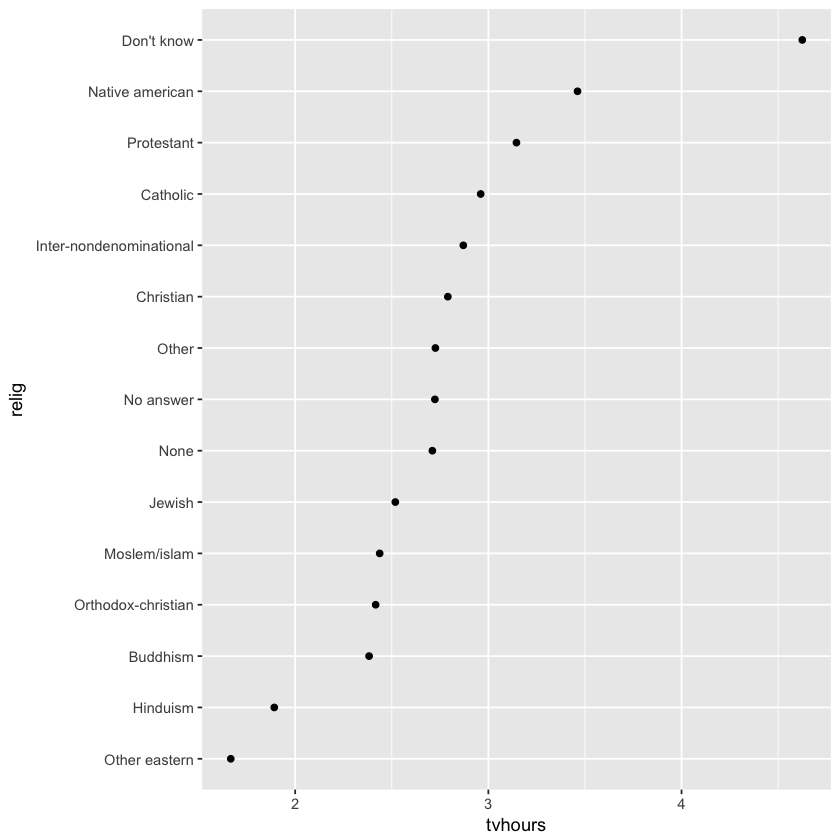

In [28]:
relig_summary %>%
  mutate(relig = fct_reorder(relig, tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()

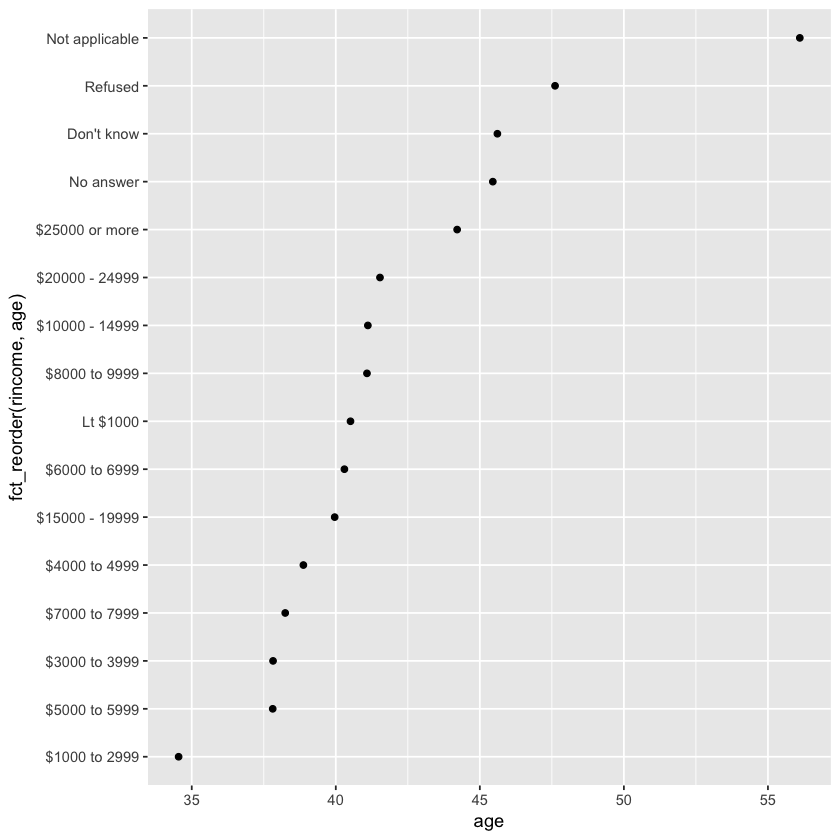

In [29]:
rincome_summary <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome_summary, aes(age, fct_reorder(rincome, age))) + geom_point()

- 여기에서 레벨을 임의로 재정렬하는 것은 좋은 생각이 아닙니다!
- rincome은 이미 우리가 혼란해서는 안되는 원칙을 가지고 있기 때문입니다. 레벨이 임의로 정렬 된 요소에 대해서는 fct_reorder ()를 예약하십시오.

- 그러나 "적용 불가"를 다른 특수 레벨과 함께 앞으로 가져 오는 것은 의미가 있습니다.
- fct_relevel ()을 사용할 수 있습니다. 그것은 인자 f와 라인의 맨 앞으로 옮기고 자하는 레벨의 수를 취합니다.

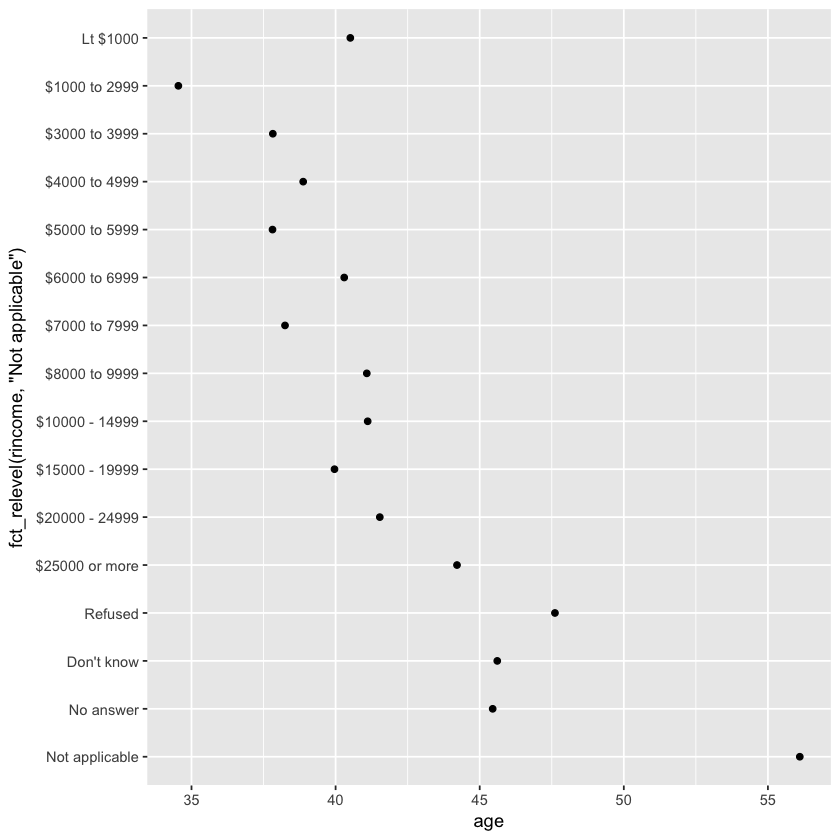

In [30]:
ggplot(rincome_summary, aes(age, fct_relevel(rincome, "Not applicable"))) +
  geom_point()

- "해당 사항 없음"의 평균 연령이 왜 그렇게 높다고 생각하십니까?
- 다른 유형의 순서 재 지정은 플롯에서 선을 채색 할 때 유용합니다. 
- fct_reorder2 ()는 가장 큰 x 값과 관련된 y 값으로 인수를 재정리합니다. 
- 이렇게 하면 선 색상이 범례와 일치하기 때문에 플롯을 더 읽기 쉽게 만듭니다.

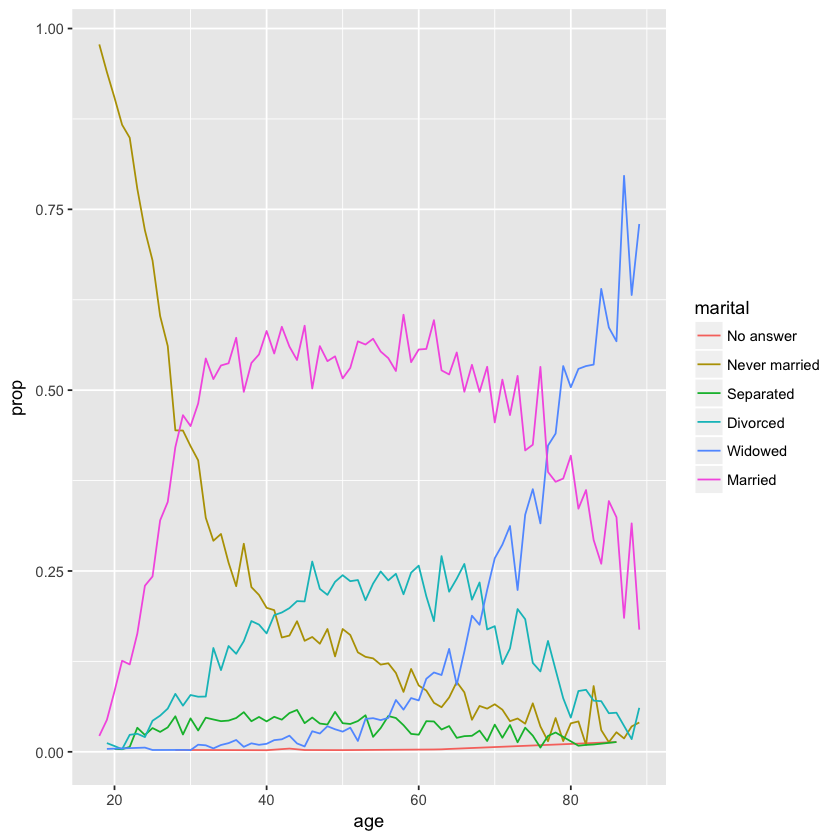

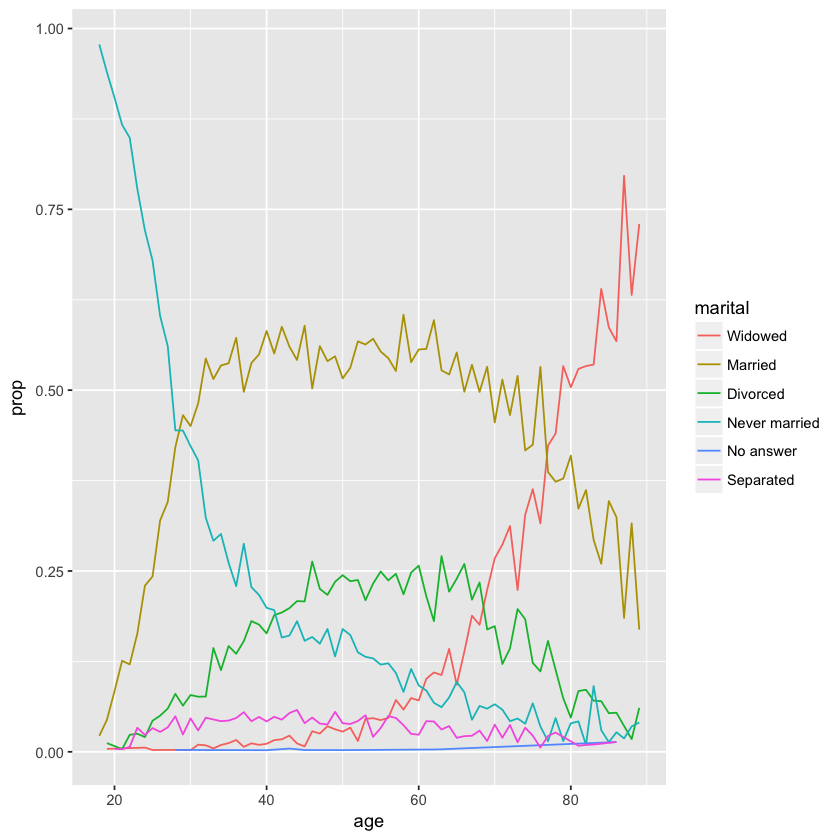

In [31]:
by_age <- gss_cat %>%
  filter(!is.na(age)) %>%
  group_by(age, marital) %>%
  count() %>%
  mutate(prop = n / sum(n))

ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")

- 마지막으로, 바 플롯의 경우 fct_infreq ()를 사용하여 빈도가 증가하는 순서로 레벨을 지정할 수 있습니다.
- 이 변수는 추가 변수가 필요 없기 때문에 가장 간단한 유형의 재정렬입니다. fct_rev ()와 결합 할 수 있습니다.

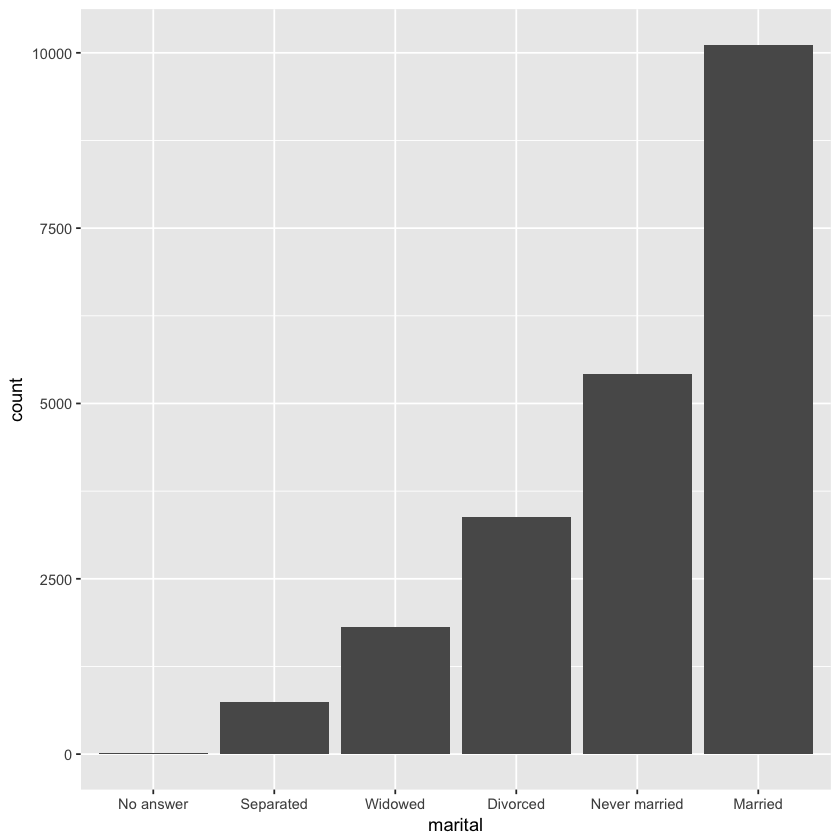

In [32]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
  ggplot(aes(marital)) +
    geom_bar()

### 15.5 Modifying factor levels

- 레벨의 순서를 변경하는 것보다 더 강력한 것은 값을 변경하는 것입니다. 
- 이를 통해 게시 용 레이블을 명확히하고 상위 수준 디스플레이의 축소 수준을 지정할 수 있습니다. 
- 가장 일반적이고 강력한 도구는 fct_recode ()입니다. 각 레벨의 값을 다시 코딩하거나 변경할 수 있습니다.

In [33]:
gss_cat %>% count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690
Strong democrat,3490


In [34]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


- fct_recode ()는 명시적으로 언급되지 않은 수준을 그대로 남겨두고 실수로 존재하지 않는 수준을 참조하는 경우 경고합니다.
- 그룹을 결합하려면 여러 개의 이전 레벨을 동일한 새 레벨에 지정할 수 있습니다.

In [35]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

partyid,n
Other,548
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


- 이 기술을 신중하게 사용해야합니다 : 진정으로 다른 범주를 함께 그룹화하면 오해의 소지가있는 결과가 발생합니다.

- 많은 레벨을 줄이려면 fct_collapse ()가 fct_recode ()의 유용한 변형입니다. 각각의 새 변수에 대해 이전 수준의 벡터를 제공 할 수 있습니다.

In [36]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    other = c("No answer", "Don't know", "Other party"),
    rep = c("Strong republican", "Not str republican"),
    ind = c("Ind,near rep", "Independent", "Ind,near dem"),
    dem = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

partyid,n
other,548
rep,5346
ind,8409
dem,7180


In [39]:
#때로는 작은 그룹 전체를 정리하여 줄거리 나 표를 더 단순하게 만들고 싶을 때도 있습니다. 그것이 fct_lump ()의 작업입니다.
gss_cat %>%
  mutate(relig = fct_lump(relig)) %>%
  count(relig)

relig,n
Protestant,10846
Other,10637


- 기본 동작은 가장 작은 그룹을 점차적으로 정리하여 집계가 여전히 가장 작은 그룹임을 확인하는 것입니다.
- 이 경우별로 도움이되지 않습니다.이 설문 조사에서 미국인 대다수가 개신교 인 것은 사실이지만, 아마도 붕괴 된 것입니다.
- 대신 n 매개 변수를 사용하여 보관하려는 그룹 수 (기타 제외)를 지정할 수 있습니다.

In [40]:
gss_cat %>%
  mutate(relig = fct_lump(relig, n = 10)) %>%
  count(relig, sort = TRUE) %>%
  print(n = Inf)

# A tibble: 10 × 2
                     relig     n
                    <fctr> <int>
1               Protestant 10846
2                 Catholic  5124
3                     None  3523
4                Christian   689
5                    Other   458
6                   Jewish   388
7                 Buddhism   147
8  Inter-nondenominational   109
9             Moslem/islam   104
10      Orthodox-christian    95


### 16 Dates and times
### 16.1 Introduction

- 이 장에서는 R에서 날짜와 시간을 사용하는 방법을 보여줍니다. 언뜻 보면 날짜와 시간이 단순 해 보입니다. 당신은 일상 생활에서 항상 사용하고, 많은 혼란을 일으키지 않습니다. 그러나 날짜와 시간에 대해 배울수록 더 복잡해집니다. 워밍업하려면 다음 세 가지 겉보기에 간단한 질문을 시도하십시오.

- 매년 365 일을 보냅니까?
- 24 시간 매일합니까?
- 매분마다 60 초가 있습니까?
- 매년 365 일이 아니라, 1 년이 윤년인지를 결정하기위한 전체 규칙을 알고 있습니까? (세 부분으로 구성되어 있습니다.) 세계의 많은 지역에서 일광 절약 시간제 (DST)를 사용하고 있기 때문에 며칠 동안 23 시간, 다른 시간대에는 25 시간을 사용한다는 것을 기억할 수도 있습니다. 일부 분에는 61 초가 걸렸으므로 지구의 자전이 점차적으로 느려지므로 지금은 언제나 윤초가 추가됩니다.

- 날짜와 시간은 달, 시간대 및 DST를 포함한 지정학적 현상의 두 가지 물리적 현상 (태양의 순환과 지구의 자전)을 조정해야하기 때문에 어렵습니다. 
- 이 장에서는 날짜와 시간에 대한 모든 세부 사항을 알려주지는 않지만 일반적인 데이터 분석 과제에 도움이되는 실용적인 기술을 제공합니다.

#### 16.1.1 Prerequisites
- 이 장에서 날짜와 시간을 사용하기가 더 쉬운 lubridate 패키지에 초점을 맞출 것입니다.
- lubridate는 핵심 tidyverse의 일부가 아니며 날짜 / 시간을 사용하여 작업 할때만 필요하기 때문입니다. 
- 연습 데이터를 위해 nycflights13도 필요합니다.

In [41]:
library(tidyverse)

library(lubridate)
library(nycflights13)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



#### Creating date/times
- 순간을 나타내는 날짜 / 시간 데이터에는 세 가지 유형이 있습니다.

- 날짜. Tibbles는 이것을 <날짜>로 인쇄합니다.

- 하루 안에 시간. Tibbles는 이것을 ```<time>``` 으로 인쇄합니다.

- 날짜-시간은 날짜와 시간을 나타냅니다. 
- 즉, 특정 시간을 특정 시간 (일반적으로 가장 가까운 초)으로 고유하게 식별합니다. Tibbles는 이것을 ```<dttm>```으로 인쇄합니다. R의 다른 곳에서 이것들을 POSIXct라고 부르지 만, 이것이 매우 유용한 이름이라고 생각하지 않습니다.

- 이 장에서는 R에 시간 저장을위한 고유 클래스가 없으므로 날짜와 날짜에만 초점을 맞출 것입니다. 필요한 경우 hms 패키지를 사용할 수 있습니다.

- 필요에 따라 작동하는 가능한 가장 단순한 데이터 유형을 항상 사용해야합니다. 즉, 날짜 - 시간 대신 날짜를 사용할 수 있다면 그렇게해야합니다. 시간대를 처리해야하기 때문에 날짜 시간이 훨씬 더 복잡해 지므로이 장의 마지막 부분에서 다시 설명하겠습니다.

- 현재 날짜 또는 날짜 - 시간을 가져 오려면 today () 또는 now ()를 사용할 수 있습니다.

In [42]:
today()
now()

[1] "2017-06-21"

[1] "2017-06-21 17:50:16 KST"

- Otherwise, there are three ways you’re likely to create a date/time:

(1) From a string.
(2) From individual date-time components.
(3) From an existing date/time object.
They work as follows.

#### From strings
- 날짜 / 시간 데이터는 종종 문자열로 제공됩니다.
- 문자열을 날짜 시간으로 파싱하는 한 가지 방법을 살펴 보았습니다. 
- 또 다른 접근법은 lubridate가 제공하는 도우미를 사용하는 것입니다. 구성 요소의 순서를 지정하면 형식이 자동으로 작동합니다. 
- 그것들을 사용하려면 날짜에 년, 월, 일이 나타나는 순서를 확인한 다음 "y", "m"및 "d"를 같은 순서로 정렬하십시오. 
- 그것은 당신에게 당신의 날짜를 파싱 할 lubridate 함수의 이름을줍니다.

In [44]:
ymd("2017-01-31")
mdy("January 31st, 2017")
dmy("31-Jan-2017")

[1] "2017-01-31"

[1] "2017-03-01"

[1] "2017-01-31"

In [45]:
ymd(20170131)

[1] "2017-01-31"

In [46]:
ymd_hms("2017-01-31 20:11:59")
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 20:11:59 UTC"

[1] "2017-01-31 08:01:00 UTC"

In [47]:
ymd(20170131, tz = "UTC")

[1] "2017-01-31 UTC"

#### 16.2.2 From individual components
- 단일 문자열 대신 여러 열에 걸쳐 날짜 - 시간 스프레드의 개별 구성 요소가있는 경우가 있습니다. 이것은 우리가 비행 데이터에 가지고있는 것입니다 :

In [48]:
flights %>% 
  select(year, month, day, hour, minute)

year,month,day,hour,minute
2013,1,1,5,15
2013,1,1,5,29
2013,1,1,5,40
2013,1,1,5,45
2013,1,1,6,0
2013,1,1,5,58
2013,1,1,6,0
2013,1,1,6,0
2013,1,1,6,0
2013,1,1,6,0


In [49]:
flights %>% 
  select(year, month, day, hour, minute) %>% 
  mutate(departure = make_datetime(year, month, day, hour, minute))


year,month,day,hour,minute,departure
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,6,0,2013-01-01 06:00:00


- 항공편의 4 가지 시간 항목 각각에 대해 동일한 작업을 수행해 보겠습니다. 
- 시간은 약간 이상한 형식으로 표시되므로 모듈러스 산술을 사용하여 시간 및 분 구성 요소를 추출합니다. 날짜 - 시간 변수를 만들면 나머지 장에서 살펴볼 변수에 초점을 맞 춥니 다.

In [50]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt <- flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))

flights_dt

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150
EWR,FLL,-5,19,2013-01-01 05:55:00,2013-01-01 06:00:00,2013-01-01 09:13:00,2013-01-01 08:54:00,158
LGA,IAD,-3,-14,2013-01-01 05:57:00,2013-01-01 06:00:00,2013-01-01 07:09:00,2013-01-01 07:23:00,53
JFK,MCO,-3,-8,2013-01-01 05:57:00,2013-01-01 06:00:00,2013-01-01 08:38:00,2013-01-01 08:46:00,140
LGA,ORD,-2,8,2013-01-01 05:58:00,2013-01-01 06:00:00,2013-01-01 07:53:00,2013-01-01 07:45:00,138


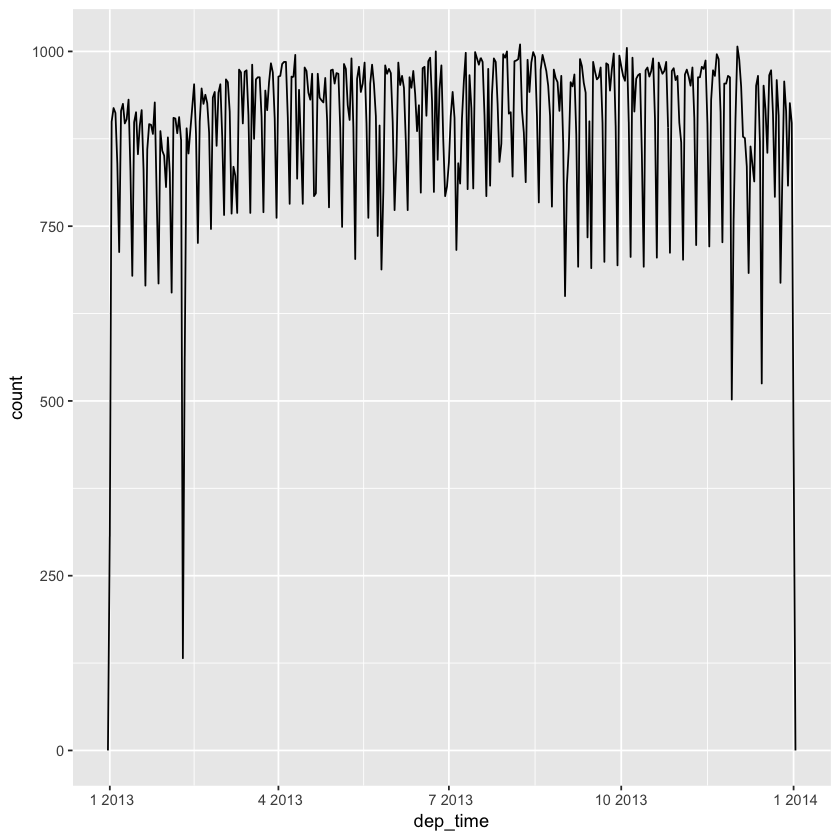

In [51]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 86400) # 86400 seconds = 1 day

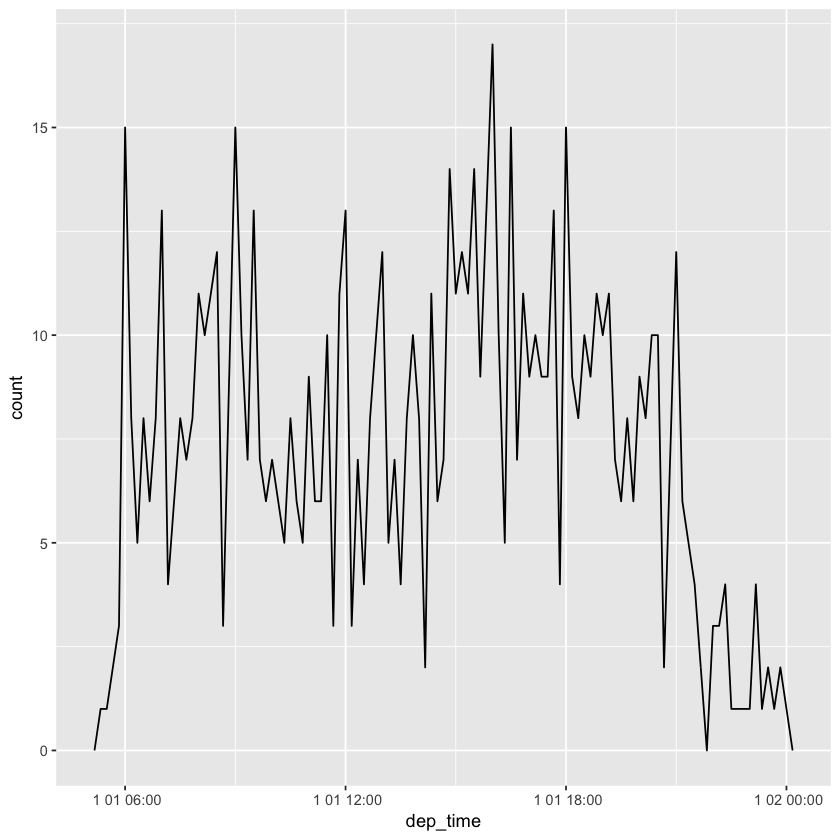

In [52]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600) # 600 s = 10 minutes

#### 16.2.3 From other types
- 날짜와 시간을 전환 할 수 있습니다. 이것이 as_datetime () 및 as_date ()의 작업입니다

In [53]:
as_datetime(today())
as_date(now())

[1] "2017-06-21 UTC"

[1] "2017-06-21"

In [54]:
as_datetime(60 * 60 * 10)
as_date(365 * 10 + 2)

[1] "1970-01-01 10:00:00 UTC"

[1] "1980-01-01"

#### 16.3 Date-time components
- 이제 R의 날짜 / 시간 데이터 구조에 날짜 / 시간 데이터를 가져 오는 방법을 알았으므로 이제는 이들을 사용하여 수행 할 수있는 작업에 대해 알아 보겠습니다. - 이 절에서는 개별 구성 요소를 가져오고 설정할 수있는 접근 자 함수에 중점을 둡니다. 다음 섹션에서는 날짜와 함께 산술이 어떻게 작동하는지 살펴 보겠습니다.

#### 16.3.1 Getting components
- 접근 자 함수 year (), month (), mday () (일), yday () (일년), wday () (요일) 등의 함수를 사용하여 날짜의 개별 부분을 추출 할 수 있습니다. , hour (), minute () 및 second ()입니다.

In [56]:
datetime <- ymd_hms("2016-07-08 12:34:56")

year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)

[1] 2016

[1] 7

[1] 8

[1] 190

[1] 6

In [57]:
month(datetime, label = TRUE)
wday(datetime, label = TRUE, abbr = FALSE)

[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

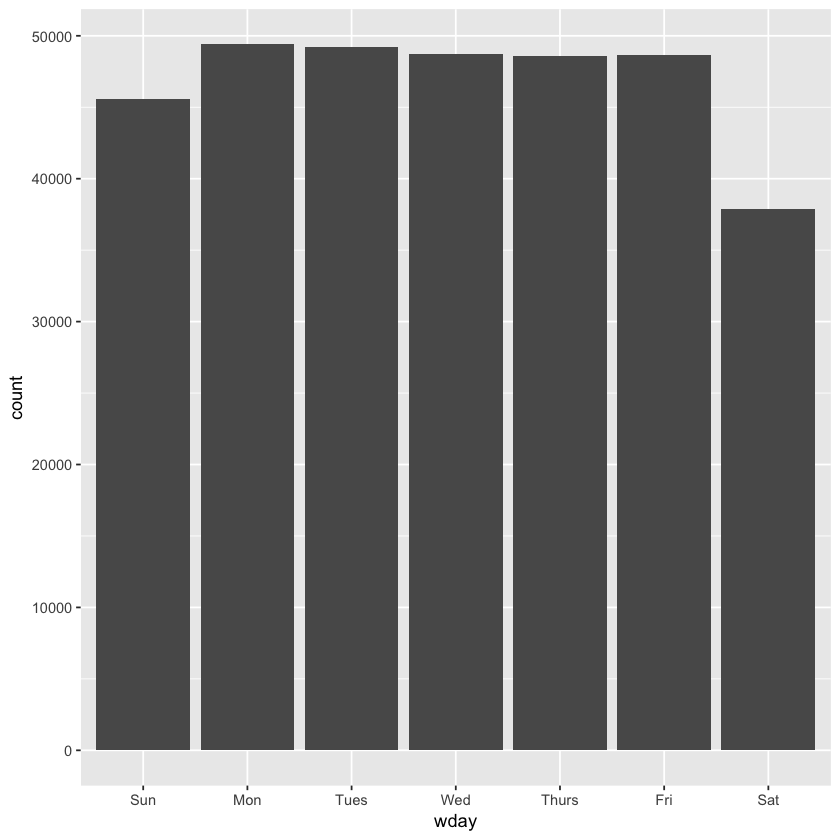

In [58]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>% 
  ggplot(aes(x = wday)) +
    geom_bar()

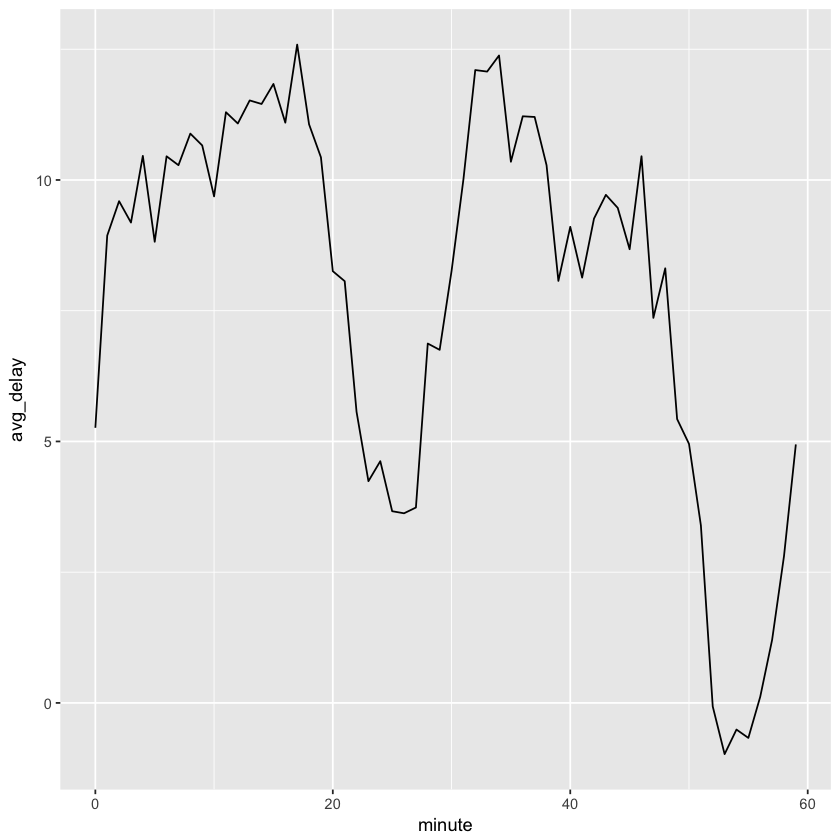

In [59]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

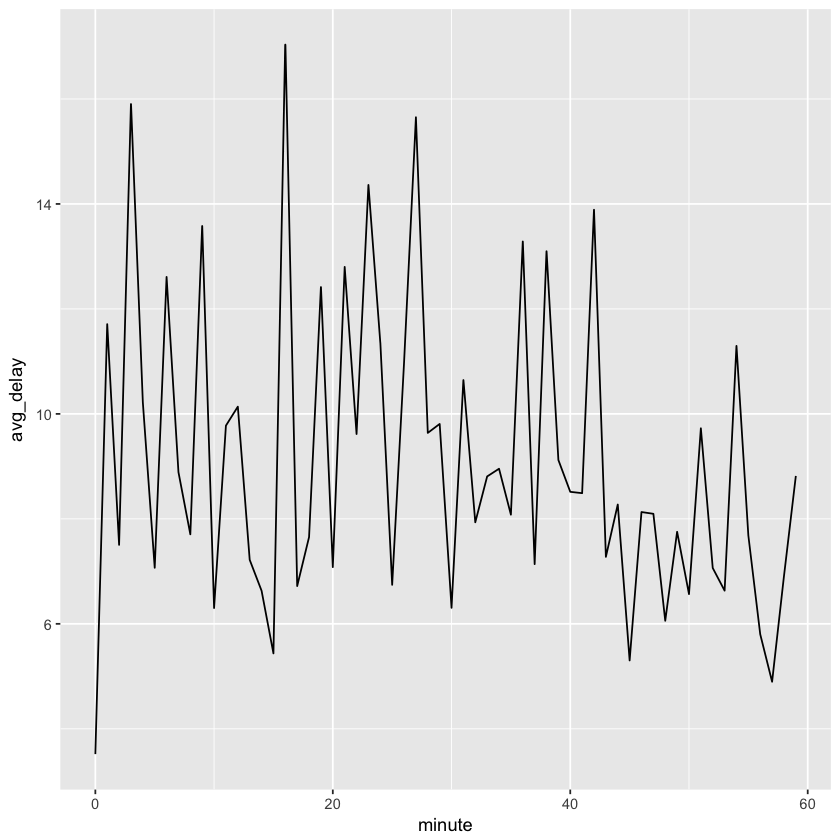

In [60]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

- 그렇다면 실제 출발 시간과 함께 그 패턴을 왜 보게됩니까? 
- 인간이 수집 한 많은 데이터와 마찬가지로, "좋은"출발 시간에 출발하는 항공편에 대한 강한 편견이 있습니다. 
- 인간의 판단과 관련된 데이터로 작업 할 때마다 항상 이런 종류의 패턴에주의하십시오!

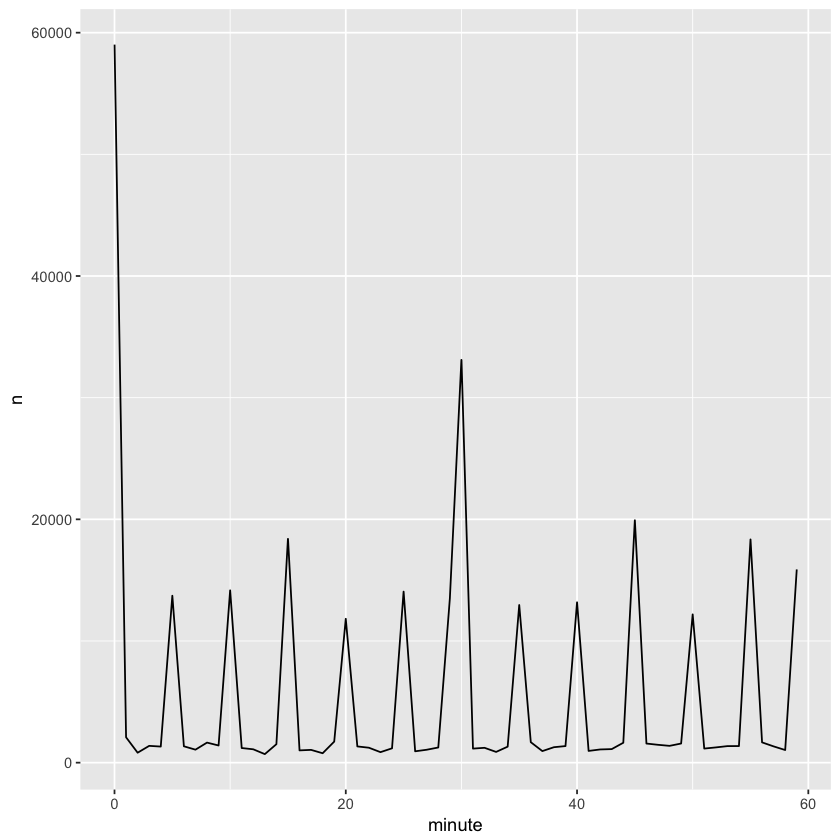

In [61]:
ggplot(sched_dep, aes(minute, n)) +
  geom_line()

#### 16.3.2 Rounding
- 개별 구성 요소를 플로팅하는 다른 방법은 floor_date (), round_date () 및 ceiling_date ()를 사용하여 날짜를 가까운 시간 단위로 반올림하는 것입니다. 
- 각 함수는 조정할 날짜의 벡터를 가져 와서 단위 이름을 반올림 (바닥), 반올림 (천장) 또는 반올림합니다. 예를 들어 일주일에 비행 횟수를 계획 할 수 있습니다.

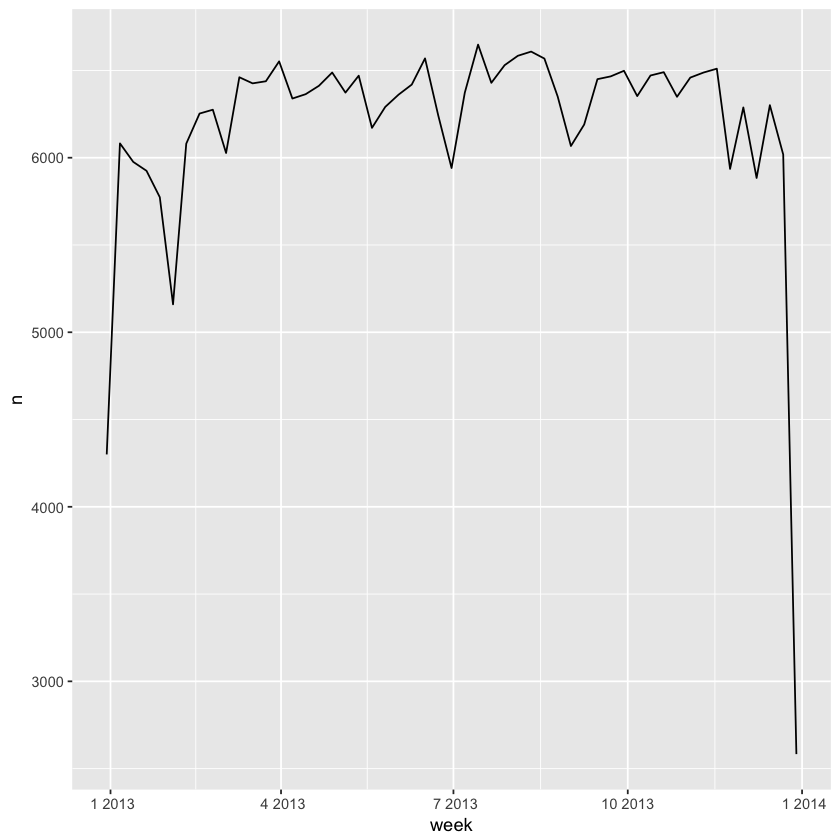

In [62]:
flights_dt %>% 
  count(week = floor_date(dep_time, "week")) %>% 
  ggplot(aes(week, n)) +
    geom_line()

#### 16.3.3 Setting components
- 각 접근 자 함수를 사용하여 날짜 / 시간의 구성 요소를 설정할 수도 있습니다.

In [63]:
(datetime <- ymd_hms("2016-07-08 12:34:56"))

year(datetime) <- 2020
datetime
month(datetime) <- 01
datetime
hour(datetime) <- hour(datetime) + 1
datetime

[1] "2016-07-08 12:34:56 UTC"

[1] "2020-07-08 12:34:56 UTC"

[1] "2020-01-08 12:34:56 UTC"

[1] "2020-01-08 13:34:56 UTC"

In [64]:
update(datetime, year = 2020, month = 2, mday = 2, hour = 2)

[1] "2020-02-02 02:34:56 UTC"

In [65]:
ymd("2015-02-01") %>% 
  update(mday = 30)
ymd("2015-02-01") %>% 
  update(hour = 400)

[1] "2015-03-02"

[1] "2015-02-17 16:00:00 UTC"

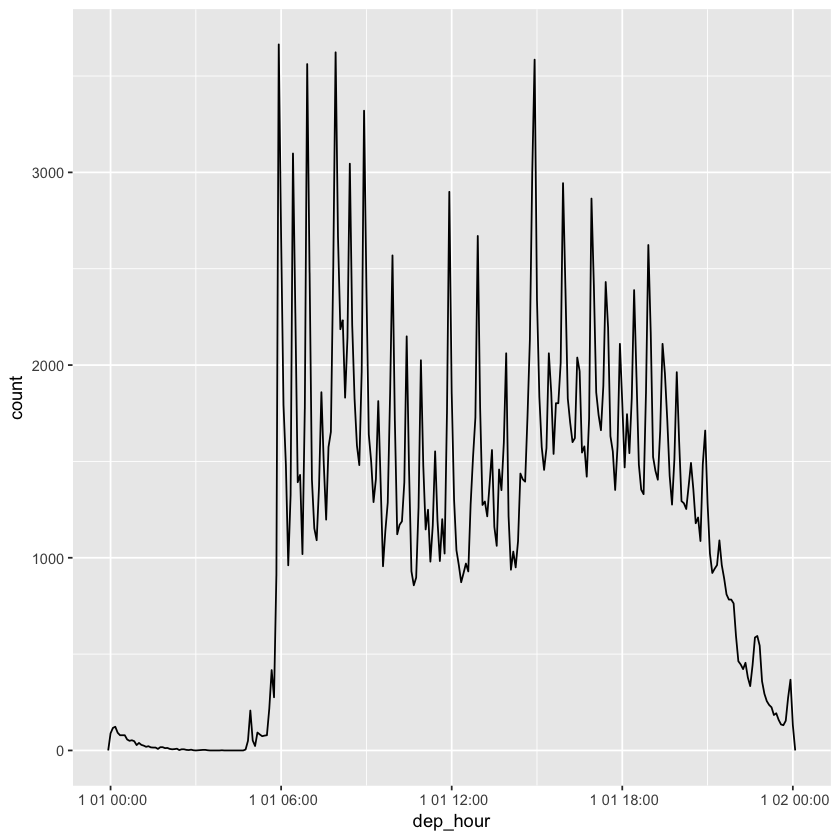

In [66]:
flights_dt %>% 
  mutate(dep_hour = update(dep_time, yday = 1)) %>% 
  ggplot(aes(dep_hour)) +
    geom_freqpoly(binwidth = 300)

#### 16.4 Time spans

- 다음은 빼기, 더하기 및 나누기를 포함하여 날짜가있는 산술 연산 방법에 대해 배웁니다. 길을 따라 가면서 시간을 나타내는 세 가지 중요한 클래스를 배웁니다.

- 기간은 정확한 초를 나타냅니다.
- 기간은 주 단위와 월 단위와 같은 인간 단위를 나타냅니다.
- 간격은 시작과 끝 지점을 나타냅니다.

#### 16.4.1 Durations

- In R, when you subtract two dates, you get a difftime object:

In [67]:
h_age <- today() - ymd(19791014)
h_age

Time difference of 13765 days

In [68]:
as.duration(h_age)

[1] "1189296000s (~37.69 years)"

In [69]:
dseconds(15)
dminutes(10)
dhours(c(12, 24))
ddays(0:5)
dweeks(3)
dyears(1)

[1] "15s"

[1] "600s (~10 minutes)"

[1] "43200s (~12 hours)" "86400s (~1 days)"

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

[1] "1814400s (~3 weeks)"

[1] "31536000s (~52.14 weeks)"

In [70]:
2 * dyears(1)
dyears(1) + dweeks(12) + dhours(15)

[1] "63072000s (~2 years)"

[1] "38847600s (~1.23 years)"

In [71]:
tomorrow <- today() + ddays(1)
last_year <- today() - dyears(1)

In [72]:
one_pm <- ymd_hms("2016-03-12 13:00:00", tz = "America/New_York")

one_pm
one_pm + ddays(1)

[1] "2016-03-12 13:00:00 EST"

[1] "2016-03-13 14:00:00 EDT"

- 3 월 13 일 오후 2시, 오후 1시 이후 언젠가는 어떨까요?! 날짜를 자세히 보면 표준 시간대가 변경된 것을 볼 수 있습니다. DST로 인해 3 월 12 일에는 23 시간 밖에 걸리지 않으므로 초 단위로 값을 추가하면 다른 시간이됩니다.

#### 16.4.2 Periods

- 이 문제를 해결하기 위해 lubridate는 마침표를 제공합니다. 기간은 시간 범위이지만 초 단위로 고정 된 길이가 아니며 대신 일 및 월과 같은 "인간"시간으로 작업합니다. 이를 통해보다 직관적 인 방식으로 작업 할 수 있습니다.

In [73]:
one_pm
one_pm + days(1)

[1] "2016-03-12 13:00:00 EST"

[1] "2016-03-13 13:00:00 EDT"

In [74]:
seconds(15)
minutes(10)
hours(c(12, 24))
days(7)
months(1:6)
weeks(3)
years(1)

[1] "15S"

[1] "10M 0S"

[1] "12H 0M 0S" "24H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

[1] "21d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

In [75]:
10 * (months(6) + days(1))
days(50) + hours(25) + minutes(2)

[1] "60m 10d 0H 0M 0S"

[1] "50d 25H 2M 0S"

In [76]:
ymd("2016-01-01") + dyears(1)
ymd("2016-01-01") + years(1)

one_pm + ddays(1)
one_pm + days(1)

[1] "2016-12-31"

[1] "2017-01-01"

[1] "2016-03-13 14:00:00 EDT"

[1] "2016-03-13 13:00:00 EDT"

- 기간을 사용하여 항공편 날짜와 관련된 이상한 점을 수정합시다. 일부 비행기는 뉴욕시를 출발하기 전에 목적지에 도착한 것처럼 보입니다.

In [77]:
flights_dt %>% 
  filter(arr_time < dep_time) 

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,BQN,9,-4,2013-01-01 19:29:00,2013-01-01 19:20:00,2013-01-01 00:03:00,2013-01-01 00:07:00,192
JFK,DFW,59,NA,2013-01-01 19:39:00,2013-01-01 18:40:00,2013-01-01 00:29:00,2013-01-01 21:51:00,NA
EWR,TPA,-2,9,2013-01-01 20:58:00,2013-01-01 21:00:00,2013-01-01 00:08:00,2013-01-01 23:59:00,159
EWR,SJU,-6,-12,2013-01-01 21:02:00,2013-01-01 21:08:00,2013-01-01 01:46:00,2013-01-01 01:58:00,199
EWR,SFO,11,-14,2013-01-01 21:08:00,2013-01-01 20:57:00,2013-01-01 00:25:00,2013-01-01 00:39:00,354
LGA,FLL,-10,-2,2013-01-01 21:20:00,2013-01-01 21:30:00,2013-01-01 00:16:00,2013-01-01 00:18:00,160
EWR,MCO,41,43,2013-01-01 21:21:00,2013-01-01 20:40:00,2013-01-01 00:06:00,2013-01-01 23:23:00,143
JFK,LAX,-7,-24,2013-01-01 21:28:00,2013-01-01 21:35:00,2013-01-01 00:26:00,2013-01-01 00:50:00,338
EWR,FLL,49,28,2013-01-01 21:34:00,2013-01-01 20:45:00,2013-01-01 00:20:00,2013-01-01 23:52:00,152
EWR,FLL,-9,-14,2013-01-01 21:36:00,2013-01-01 21:45:00,2013-01-01 00:25:00,2013-01-01 00:39:00,154


- 이것은 야간 비행입니다. 출발 시간과 도착 시간 모두 동일한 날짜 정보를 사용했지만 다음 날 도착했습니다. 각 야간 항공편의 도착 시간에 일 (1)을 추가하여 문제를 해결할 수 있습니다.

In [78]:
flights_dt <- flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  )

In [80]:
flights_dt %>% 
  filter(overnight, arr_time < dep_time) 

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight


#### 16.4.3 Intervals

- dyears (1) / ddays (365)가 반환해야하는 것은 분명합니다. 기간은 항상 초 단위로 표시되고 1 년 기간은 초당 365 일로 정의됩니다.

- 몇 년 (1) / 일 (1)이 반환되어야합니까? 글쎄, 올해가 2015 년이면 365를 반환해야하지만, 2016 년이면 366을 반환해야합니다! lubridate가 하나의 확실한 답을 줄 수있는 충분한 정보가 없습니다. 대신 경고를 통해 예상치를 제공합니다.

In [81]:
years(1) / days(1)

estimate only: convert to intervals for accuracy


[1] 365.25

In [82]:
next_year <- today() + years(1)
(today() %--% next_year) / ddays(1)

[1] 365

In [83]:
(today() %--% next_year) %/% days(1)

Note: method with signature ‘Timespan#Timespan’ chosen for function ‘%/%’,
 target signature ‘Interval#Period’.
 "Interval#ANY", "ANY#Period" would also be valid


[1] 365

#### 16.4.4 Summary
- 기간, 기간 및 간격은 어떻게 선택합니까? 항상 그렇듯이 문제를 해결하는 가장 간단한 데이터 구조를 선택하십시오. 
- 실제 시간 만 신경 쓰는 경우에는 시간을 사용하십시오. 휴먼 타임을 추가해야하는 경우 마침표를 사용하십시오. 스팬이 인간 단위로 얼마나 오래 있는지 알아야 할 경우 간격을 사용하십시오.

<img src ="http://r4ds.had.co.nz/diagrams/datetimes-arithmetic.png">

#### 16.5 Time zones

- 지정 학적 실체와의 상호 작용 때문입니다. 다행히도 데이터 분석을 위해 모두 중요하지는 않기 때문에 모든 세부 사항을 자세히 조사 할 필요는 없지만 앞으로 해결해야 할 몇 가지 문제가 있습니다.

- 첫 번째 과제는 시간대의 일상적인 이름이 애매한 경향이 있다는 것입니다. 예를 들어, 미국인이라면 동부 표준시 또는 동부 표준시에 대해 잘 알고있을 것입니다. 그러나 호주와 캐나다 모두 EST를 보유하고 있습니다! 혼동을 피하기 위해 R은 국제 표준 IANA 표준 시간대를 사용합니다. 

- 이들은 일반적으로 "<대륙성> / <도시>"형식으로 일관된 명명 체계 "/"를 사용합니다 (모든 국가가 대륙에있는 것은 아니기 때문에 몇 가지 예외가 있습니다). 예로는 "America / New_York", "Europe / Paris"및 "Pacific / Auckland"가 있습니다.

- 시간대가 도시를 사용하는 이유에 대해 궁금해 할 것입니다. 일반적으로 시간대를 한 국가 내의 국가 또는 지역과 연결되어 있다고 생각할 때가 있습니다. 이는 IANA 데이터베이스가 수십 년에 걸친 시간대 규칙을 기록해야하기 때문입니다. 

- 수십 년 동안 국가들은 이름을 꽤 자주 바꾸었지만 도시 이름은 똑같이 유지되는 경향이 있습니다. 또 다른 문제는 이름이 현재의 행동뿐만 아니라 완전한 역사를 반영해야한다는 것입니다. 예를 들어, "America / New_York"및 "America / Detroit"의 시간대가 있습니다. 

- 이 두 도시는 현재 동부 표준시를 사용하지만 1969-1972 미시간 (DST가있는 주)에서는 DST를 따르지 않으므로 다른 이름이 필요합니다. 이 이야기 중 일부를 읽으려면 원시 시간대 데이터베이스 (http://www.iana.org/time-zones에서 사용 가능)를 읽는 것이 좋습니다!

In [84]:
Sys.timezone()

[1] "Asia/Seoul"

In [85]:
length(OlsonNames())
head(OlsonNames())

[1] 593

[1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
[4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"

In [86]:
(x1 <- ymd_hms("2015-06-01 12:00:00", tz = "America/New_York"))
(x2 <- ymd_hms("2015-06-01 18:00:00", tz = "Europe/Copenhagen"))
(x3 <- ymd_hms("2015-06-02 04:00:00", tz = "Pacific/Auckland"))

[1] "2015-06-01 12:00:00 EDT"

[1] "2015-06-01 18:00:00 CEST"

[1] "2015-06-02 04:00:00 NZST"

- 다른 지정이없는 한, lubridate는 항상 UTC를 사용합니다.
- UTC (Coordinated Universal Time)는 과학 공동체가 사용하는 표준 시간대이며 전 GMT (그리니치 표준시)와 대략 동일합니다.
- DST가 없기 때문에 계산을 편리하게 나타낼 수 있습니다. c ()와 같은 날짜 - 시간을 결합하는 작업은 종종 시간대를 삭제합니다. 이 경우 날짜 시간이 현지 시간대로 표시됩니다.

In [87]:
x4 <- c(x1, x2, x3)
x4

[1] "2015-06-02 01:00:00 KST" "2015-06-02 01:00:00 KST"
[3] "2015-06-02 01:00:00 KST"

In [88]:
x4a <- with_tz(x4, tzone = "Australia/Lord_Howe")
x4a

[1] "2015-06-02 02:30:00 LHST" "2015-06-02 02:30:00 LHST"
[3] "2015-06-02 02:30:00 LHST"

In [89]:
x4b <- force_tz(x4, tzone = "Australia/Lord_Howe")
x4b

[1] "2015-06-02 01:00:00 LHST" "2015-06-02 01:00:00 LHST"
[3] "2015-06-02 01:00:00 LHST"

- 기본 순간을 변경하십시오. 올바르지 않은 표준 시간대로 레이블이 지정된 순간이 있고이를 수정해야하는 경우에 사용하십시오.

In [90]:
x4b - x4

Time differences in hours
[1] -1.5 -1.5 -1.5